<a href="https://colab.research.google.com/github/karim306/Flowers-Classfier/blob/main/FlowerClassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install dependeiceies and Setup**

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "kareemahm3d" # username from the json file
os.environ['KAGGLE_KEY'] = "505cd3f923d9c7e981e2a419cb8f88b4" # key from the json fil

In [2]:
import tensorflow as tf


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

**# Download The DataSet**


In [4]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset
License(s): other
 93% 225M/242M [00:01<00:00, 156MB/s]
100% 242M/242M [00:01<00:00, 129MB/s]


**# Unzip the dataset**


In [5]:
# Unzip the dataset into the same directory
!unzip -q 5-flower-types-classification-dataset.zip -d ./5-flower-dataset


# **2. Remove dodgy images:**

In [9]:
import cv2
import imghdr

In [10]:
data_dir = '/content/flower_images'

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Load Data**

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/flower_images')

Found 4999 files belonging to 5 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
len(batch)

2

In [17]:
batch[1]


array([2, 2, 3, 1, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 4, 4, 4, 3, 3, 3, 4, 3,
       3, 2, 4, 0, 0, 0, 3, 4, 4, 0], dtype=int32)

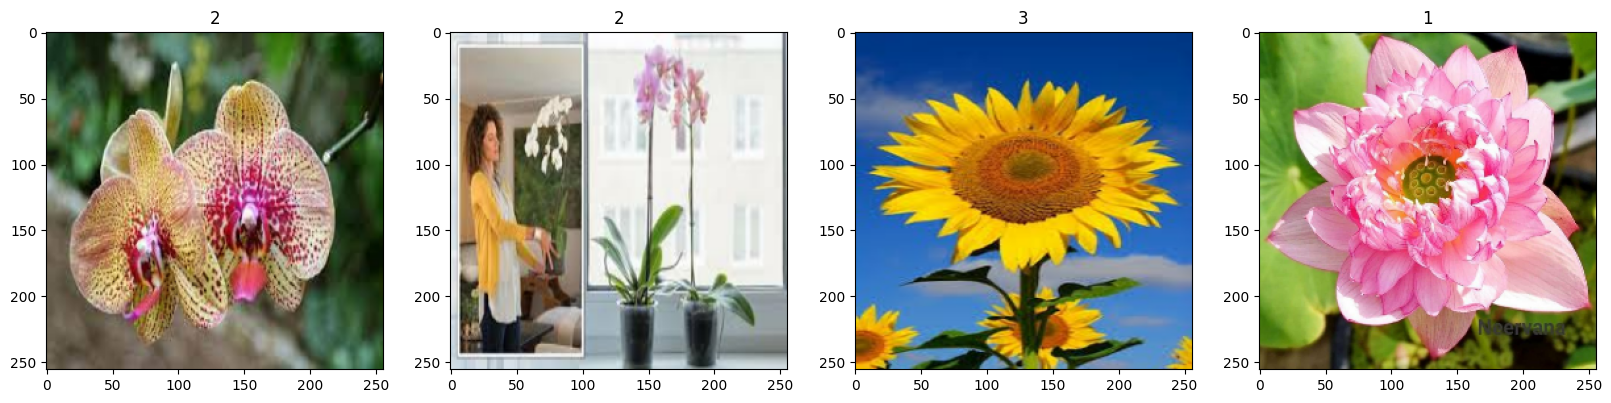

In [18]:
# know each number represent any of our 5 classes

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scaling The Data**

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[1.        , 0.9764706 , 0.6392157 ],
          [1.        , 0.9764706 , 0.6318781 ],
          [1.        , 0.9799709 , 0.62437195],
          ...,
          [0.28206187, 0.48121935, 0.17015165],
          [0.2460478 , 0.4379519 , 0.11537224],
          [0.23137255, 0.41960785, 0.08235294]],
 
         [[1.        , 0.9709253 , 0.636443  ],
          [0.997406  , 0.97351927, 0.6291054 ],
          [0.9972273 , 0.97224855, 0.6166496 ],
          ...,
          [0.29345042, 0.49815324, 0.19045389],
          [0.26044726, 0.4573606 , 0.14345637],
          [0.25355393, 0.43901655, 0.115625  ]],
 
         [[1.        , 0.964614  , 0.6272672 ],
          [0.99257636, 0.9664054 , 0.6180522 ],
          [0.9956473 , 0.96481967, 0.60878956],
          ...,
          [0.29924726, 0.51226807, 0.21936496],
          [0.27657694, 0.48171547, 0.17969169],
          [0.27478555, 0.46712622, 0.1615196 ]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [21]:
batch_iterator = data.as_numpy_iterator().next()

In [22]:
batch_iterator[0].max()

1.0

# **Split The Data**

In [23]:
len(data )

157

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
val_size

31

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Building The Model**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))  # Increased number of filters and more layers
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))  # Another convolutional layer
model.add(MaxPooling2D())

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))  # Increased dense layer size
model.add(Dense(256, activation='relu'))  # Another dense layer
num_classes = 5  # Replace with the actual number of classes in your dataset
# Output layer for multi-class classification
model.add(Dense(num_classes, activation='softmax'))  # 'num_classes' should be the number of classes in your dataset


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,075,621 (49.88 MB)

 Trainable params: 13,075,621 (49.88 MB)

 Non-trainable params: 0 (0.00 B)

# **Training The Model**

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer from tensorflow.keras.optimizers

# Change this if labels are integer-encoded
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])



In [36]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
  9/109 ━━━━━━━━━━━━━━━━━━━━ 4:21 3s/step - accuracy: 0.1962 - loss: 2.3575

KeyboardInterrupt: 

# **Plot Performance**

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evauation**

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# **Testing**

In [39]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')